# Model training

# Maximum sub-band average

In [2]:
from utils_training import train
from utils_training import GNN
from utils_training import getLoader
import torch
import datetime

MAIN_DIR = "C:\\Users\\Gyu-Jang Sim\\Documents\\FIPGraph"

# train_dirs = ['30_45_90', '30_45_90_160']
train_dirs = ['30']

print('started at: ', datetime.datetime.now())
for train_dir in train_dirs:

    train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{train_dir}\\train_datalist.pickle',
                            batch_fraction=0.2,
                            )

    val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{train_dir}\\val_datalist.pickle',
                        batch_fraction=1.0,
                        )


    train_params = {
        'opt_name': 'Adam',
        'n_epoch': 1000,
        'lr': 5.e-2,
        'weight_decay': 1.e-4,
        'loss_fname': 'mseLoss',
        'lr_decay_rate': 0.8
    }

    # for n in [2,4,8,16,32]:
    #     for k in [1,2,3,4,5,6,7]:
    for n in [16]:
        for k in [4]:
            model = GNN(n,k)

            train(model=model,
                train_params=train_params,
                train_loader=train_loader,
                val_loader=val_loader,
                logfile_dir=f'{MAIN_DIR}\\learning_curves\\{train_dir}\\n_{n}_k_{k}.csv',
                print_mode=True
                )

            torch.save(model.state_dict(), f'{MAIN_DIR}\\trained_weights\\{train_dir}\\weights_n_{n}_k_{k}.pt')

            print(f'training for {train_dir}, n={n}, k={k} ended : {datetime.datetime.now()}')

started at:  2024-01-10 16:10:34.415088
[Epoch 0]
[Loss : 1.060080885887146]
[meanARE : 1.7717349529266357]
[Learning rate : 0.0005]
[Epoch 5]
[Loss : 0.630374014377594]
[meanARE : 2.656770706176758]
[Learning rate : 0.003]
[Epoch 10]
[Loss : 0.152988463640213]
[meanARE : 2.3068792819976807]
[Learning rate : 0.0055000000000000005]
[Epoch 15]
[Loss : 0.08912423253059387]
[meanARE : 1.6627799272537231]
[Learning rate : 0.008]
[Epoch 20]
[Loss : 0.07859160006046295]
[meanARE : 1.430517554283142]
[Learning rate : 0.0105]
[Epoch 25]
[Loss : 0.07458072900772095]
[meanARE : 1.4137041568756104]
[Learning rate : 0.013000000000000001]
[Epoch 30]
[Loss : 0.07327574491500854]
[meanARE : 1.392187476158142]
[Learning rate : 0.0155]
[Epoch 35]
[Loss : 0.07527609169483185]
[meanARE : 1.4123401641845703]
[Learning rate : 0.018]
[Epoch 40]
[Loss : 0.07260647416114807]
[meanARE : 1.382034420967102]
[Learning rate : 0.0205]
[Epoch 45]
[Loss : 0.07235006242990494]
[meanARE : 1.3353557586669922]
[Learning r

KeyboardInterrupt: 

## Visualize train set

tensor(0.0638, grad_fn=<MseLossBackward0>)
tensor(0.1695, grad_fn=<MeanBackward0>)


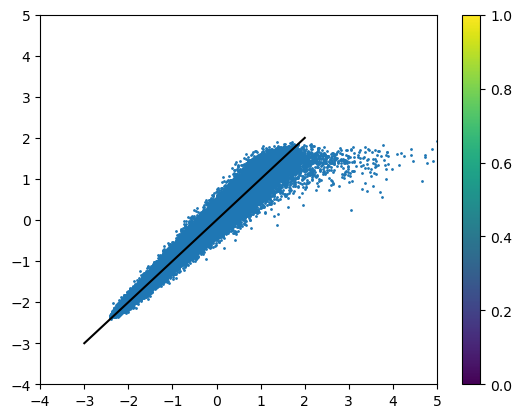

In [3]:
import torch
from utils_postprocessing import parity_plot
from utils_training import GNN

MAIN_DIR = "C:\\Users\\Gyu-Jang Sim\\Documents\\FIPGraph"
TRAIN_DIR = "30"

model = GNN(n,k)
weights = torch.load(f'{MAIN_DIR}\\trained_weights\\{TRAIN_DIR}\\weights_n_{n}_k_{k}.pt')
loader_dir = f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{TRAIN_DIR}\\train_datalist.pickle'

parity_plot(model,weights,loader_dir)

## Visualize validation set

tensor(0.0577, grad_fn=<MseLossBackward0>)
tensor(0.1675, grad_fn=<MeanBackward0>)


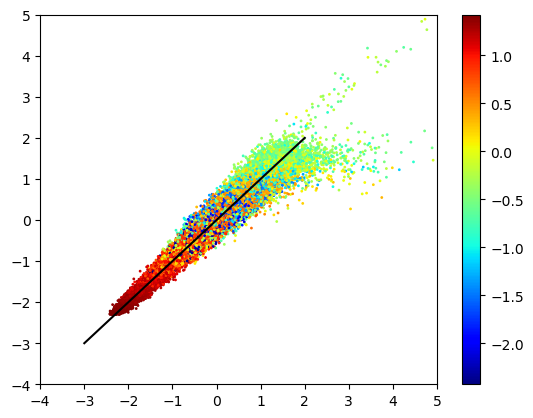

In [12]:
import numpy as np
import torch
from utils_training import getLoader

train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\train_datalist.pickle',
                         batch_fraction=1,
                         )

val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{30}\\val_datalist.pickle',
                       batch_fraction=1.0,
                       )
## 
from utils_training import GNN
iterer = iter(train_loader)
train_batch = next(iterer)
y = model(train_batch)
from matplotlib import pyplot as plt
plt.scatter(train_batch.fip.detach().numpy(), y.detach().numpy(), s=1, c=train_batch.x[:,16], cmap='jet')
plt.colorbar()
plt.plot([-3,2],[-3,2],color='black')
plt.xlim((-4,5))
plt.ylim((-4,5))
import torch.nn.functional as F
print(F.mse_loss(y, train_batch.fip))
# print(np.mean(np.abs(y.detach().numpy() - train_batch.fip.detach().numpy()/train_batch.fip.detach().numpy())))
print(F.l1_loss(y, train_batch.fip))

tensor(0.0663, grad_fn=<MseLossBackward0>)
tensor(0.1814, grad_fn=<MeanBackward0>)


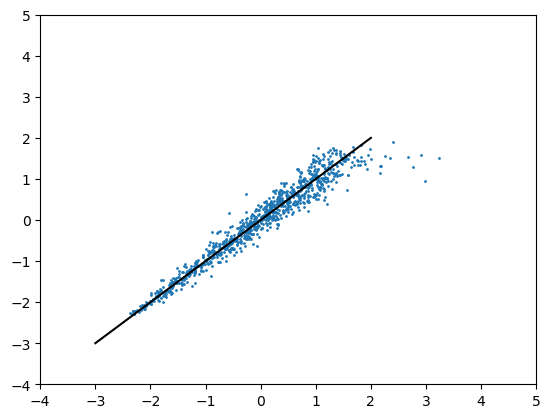

In [106]:
train_batch = next(iterer)
y = model(train_batch)
from matplotlib import pyplot as plt
plt.scatter(train_batch.fip.detach().numpy(), y.detach().numpy(), s=1, cmap='jet')
# plt.colorbar()
plt.plot([-3,2],[-3,2],color='black')
plt.xlim((-4,5))
plt.ylim((-4,5))
import torch.nn.functional as F
print(F.mse_loss(y, train_batch.fip))
# print(np.mean(np.abs(y.detach().numpy() - train_batch.fip.detach().numpy()/train_batch.fip.detach().numpy())))
print(F.l1_loss(y, train_batch.fip))

# Average over elements

In [2]:
from utils_training import train
from utils_training import GNN
from utils_training import getLoader
import torch
import datetime

MAIN_DIR = "C:\\Users\\Gyu-Jang Sim\\Documents\\FIPGraph"

# train_dirs = ['30', '30_45', '30_45_90']
train_dirs = ['90']

print('started at: ', datetime.datetime.now())
for train_dir in train_dirs:

    train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{train_dir}\\train_datalist_avg.pickle',
                            batch_fraction=0.2,
                            )

    val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{train_dir}\\val_datalist_avg.pickle',
                        batch_fraction=1.0,
                        )


    train_params = {
        'opt_name': 'Adam',
        'n_epoch': 20,
        'lr': 5.e-2,
        'weight_decay': 1.e-4,
        'loss_fname': 'mseLoss',
        'lr_decay_rate': 0.8
    }

    # for trial in range(4):
    #     for n in [2,4,8,16]:
    #         for k in [1,2,3,4,5,6,7]:
    for n in [16]:
        for k in [4]:
            model = GNN(n,k)

            train(model=model,
                train_params=train_params,
                train_loader=train_loader,
                val_loader=val_loader,
                logfile_dir=f'{MAIN_DIR}\\learning_curves\\{train_dir}\\n_{n}_k_{k}_avg.csv',
                print_mode=True
                )

            torch.save(model.state_dict(), f'{MAIN_DIR}\\trained_weights\\{train_dir}\\weights_n_{n}_k_{k}_avg.pt')

            print(f'training for {train_dir}, n={n}, k={k} ended : {datetime.datetime.now()}')

started at:  2024-01-11 23:26:15.342214
[Epoch 0]
[Loss : 1.0557941198349]
[meanARE : 2.6464600563049316]
[Learning rate : 0.0005]
[Epoch 5]
[Loss : 0.3646399974822998]
[meanARE : 3.9881420135498047]
[Learning rate : 0.003]
[Epoch 10]
[Loss : 0.09003020823001862]
[meanARE : 2.5908613204956055]
[Learning rate : 0.0055000000000000005]
[Epoch 15]
[Loss : 0.05503750964999199]
[meanARE : 1.8704530000686646]
[Learning rate : 0.008]
training for 90, n=16, k=4 ended : 2024-01-11 23:27:13.997444


### MLP

In [2]:
from utils_training import train
from utils_training import MLP
from utils_training import getLoader
import torch
import datetime

MAIN_DIR = "C:\\Users\\Gyu-Jang Sim\\Documents\\FIPGraph"

# train_dirs = ['30', '30_45', '30_45_90']
train_dirs = ['30']

print('started at: ', datetime.datetime.now())
for train_dir in train_dirs:

    train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{train_dir}\\train_datalist_avg.pickle',
                            batch_fraction=0.2,
                            )

    val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{train_dir}\\val_datalist_avg.pickle',
                        batch_fraction=1.0,
                        )


    train_params = {
        'opt_name': 'Adam',
        'n_epoch': 1000,
        'lr': 5.e-2,
        'weight_decay': 1.e-4,
        'loss_fname': 'mseLoss',
        'lr_decay_rate': 0.8
    }

    # for n in [2,4,8,16,32]:
    #     for k in [1,2,3,4,5,6,7]:
    # for n in [8]:
    #     for k in [7]:
    model = MLP()

    train(model=model,
        train_params=train_params,
        train_loader=train_loader,
        val_loader=val_loader,
        logfile_dir=f'{MAIN_DIR}\\learning_curves\\{train_dir}\\MLP_avg.csv',
        print_mode=True
        )

    torch.save(model.state_dict(), f'{MAIN_DIR}\\trained_weights\\{train_dir}\\weights_MLP_avg.pt')

    # print(f'training for {train_dir}, n={n}, k={k} ended : {datetime.datetime.now()}')

started at:  2024-01-08 14:27:09.607188
[Epoch 0]
[Loss : 1.0380796194076538]
[meanARE : 1.1389349699020386]
[Learning rate : 0.0005]
[Epoch 5]
[Loss : 0.8148064613342285]
[meanARE : 1.1058987379074097]
[Learning rate : 0.003]
[Epoch 10]
[Loss : 0.12733905017375946]
[meanARE : 1.6691871881484985]
[Learning rate : 0.0055000000000000005]
[Epoch 15]
[Loss : 0.06866292655467987]
[meanARE : 1.049910545349121]
[Learning rate : 0.008]
[Epoch 20]
[Loss : 0.0550527460873127]
[meanARE : 0.9897499680519104]
[Learning rate : 0.0105]
[Epoch 25]
[Loss : 0.05003082752227783]
[meanARE : 0.9223025441169739]
[Learning rate : 0.013000000000000001]
[Epoch 30]
[Loss : 0.04658379778265953]
[meanARE : 0.8715541958808899]
[Learning rate : 0.0155]
[Epoch 35]
[Loss : 0.04473021626472473]
[meanARE : 0.8402302861213684]
[Learning rate : 0.018]
[Epoch 40]
[Loss : 0.043552789837121964]
[meanARE : 0.8187121152877808]
[Learning rate : 0.0205]
[Epoch 45]
[Loss : 0.043152038007974625]
[meanARE : 0.8191347718238831]
[Le

### Aniso

In [1]:

from utils_training import train
from utils_training import GNNAniso
from utils_training import getLoader
import torch
import datetime

MAIN_DIR = "C:\\Users\\Gyu-Jang Sim\\Documents\\FIPGraph"

# train_dirs = ['30', '30_45', '30_45_90']
train_dirs = ['30']

print('started at: ', datetime.datetime.now())
for train_dir in train_dirs:

    train_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{train_dir}\\train_datalist_avg.pickle',
                            batch_fraction=0.2,
                            )

    val_loader = getLoader(datalist_dir=f'{MAIN_DIR}\\preprocessing\\graph_torchdata\\{train_dir}\\val_datalist_avg.pickle',
                        batch_fraction=1.0,
                        )


    train_params = {
        'opt_name': 'Adam',
        'n_epoch': 1000,
        'lr': 5.e-2,
        'weight_decay': 1.e-4,
        'loss_fname': 'mseLoss',
        'lr_decay_rate': 0.8
    }

    # for n in [2,4,8,16,32]:
    #     for k in [1,2,3,4,5,6,7]:
    # for n in [8]:
    #     for k in [7]:
    model = GNNAniso(38,8)

    train(model=model,
        train_params=train_params,
        train_loader=train_loader,
        val_loader=val_loader,
        logfile_dir=f'{MAIN_DIR}\\learning_curves\\{train_dir}\\GIN_avg.csv',
        print_mode=True
        )

    torch.save(model.state_dict(), f'{MAIN_DIR}\\trained_weights\\{train_dir}\\weights_GIN_avg.pt')

    # print(f'training for {train_dir}, n={n}, k={k} ended : {datetime.datetime.now()}')

started at:  2024-01-08 14:23:51.304310


c:\Users\Gyu-Jang Sim\Documents\FIPGraph\code\utils_training.py:235: UserWarning: Using a target size (torch.Size([10019])) that is different to the input size (torch.Size([36])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  train_loss =  loss_func(train_pred, train_true)


RuntimeError: The size of tensor a (36) must match the size of tensor b (10019) at non-singleton dimension 0